<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/AI_W4_bai2_25_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=72276071ce4dd90eedddb2574a5e472574c685c6c025c02cdca94409481af48e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


85.34132779686902


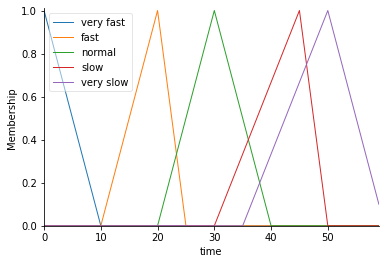

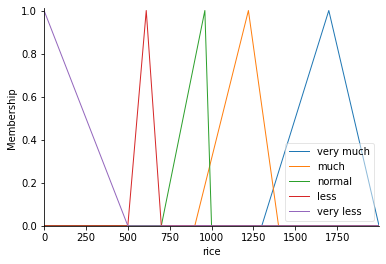

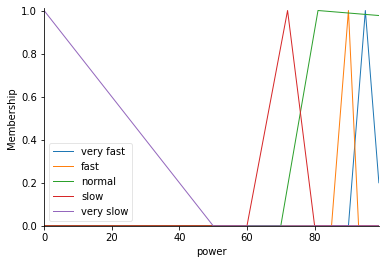

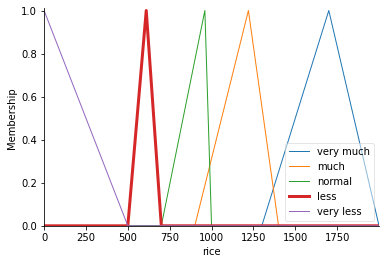

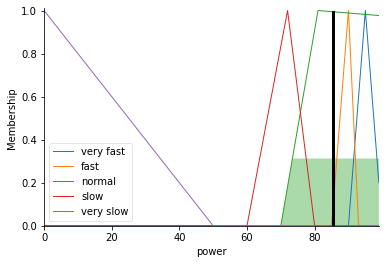

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time= ctrl.Antecedent(np.arange(0,60,1),'time')
rice= ctrl.Antecedent(np.arange(0,2000,1),'rice')
power= ctrl.Consequent(np.arange(0,100,1,),'power')

time['very fast']=fuzz.trimf(time.universe,[0,0,10])
time['fast']=fuzz.trimf(time.universe,[10,20,25])
time['normal']=fuzz.trimf(time.universe,[20,30,40])
time['slow']=fuzz.trimf(time.universe,[30,45,50])
time['very slow']=fuzz.trimf(time.universe,[35,50,60])

rice['very much']=fuzz.trimf(rice.universe,[1300,1700,2000])
rice['much']=fuzz.trimf(rice.universe,[900,1220,1400])
rice['normal']=fuzz.trimf(rice.universe,[700,960,1000])
rice['less']=fuzz.trimf(rice.universe,[500,610,700])
rice['very less']=fuzz.trimf(rice.universe,[0,0,500])

power['very fast']= fuzz.trimf(power.universe,[90,95,100])
power['fast']= fuzz.trimf(power.universe,[85,90,93])
power['normal']= fuzz.trimf(power.universe,[70,81,855])
power['slow']= fuzz.trimf(power.universe,[60,72,80])
power['very slow']= fuzz.trimf(power.universe,[0,0,50])

time.view()
rice.view()
power.view()
rice['less'].view()
#rule
rule1 =ctrl.Rule(time['very slow']&rice['very less'],power['slow'])
rule2 =ctrl.Rule(time['very slow']&rice['less'],power['very slow'])
rule3 =ctrl.Rule(time['very slow']&rice['normal'],power['slow'])
rule4 =ctrl.Rule(time['very slow']&rice['much'],power['normal'])
rule5 =ctrl.Rule(time['very slow']&rice['very much'],power['fast'])

rule6 =ctrl.Rule(time['slow']&rice['very less'],power['very slow'])
rule7 =ctrl.Rule(time['slow']&rice['less'],power['very slow'])
rule8 =ctrl.Rule(time['slow']&rice['normal'],power['slow'])
rule9 =ctrl.Rule(time['slow']&rice['much'],power['normal'])
rule10 =ctrl.Rule(time['slow']&rice['very much'],power['fast'])

rule11 =ctrl.Rule(time['normal']&rice['very less'],power['very slow'])
rule12 =ctrl.Rule(time['normal']&rice['less'],power['slow'])
rule13 =ctrl.Rule(time['normal']&rice['normal'],power['slow'])
rule14 =ctrl.Rule(time['normal']&rice['much'],power['fast'])
rule15 =ctrl.Rule(time['normal']&rice['very much'],power['fast'])

rule16 =ctrl.Rule(time['fast']&rice['very less'],power['normal'])
rule17 =ctrl.Rule(time['fast']&rice['less'],power['normal'])
rule18 =ctrl.Rule(time['fast']&rice['normal'],power['fast'])
rule19 =ctrl.Rule(time['fast']&rice['much'],power['fast'])
rule20 =ctrl.Rule(time['fast']&rice['very much'],power['very fast'])

rule21 =ctrl.Rule(time['very fast']&rice['very less'],power['fast'])
rule22 =ctrl.Rule(time['very fast']&rice['less'],power['fast'])
rule23 =ctrl.Rule(time['very fast']&rice['normal'],power['very fast'])
rule24 =ctrl.Rule(time['very fast']&rice['much'],power['very fast'])
rule25 =ctrl.Rule(time['very fast']&rice['very much'],power['very fast'])



#------------
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=50
tipping.input['rice']=1000
tipping.compute()
print(tipping.output['power'])
power.view(sim= tipping)




